In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

from config import chirp, harmonic, ar_impulse

In [2]:
def plot_truncated_distributions(config, title):
  """
  Fonction pour tracer les distributions tronquées définies dans un dictionnaire.

  Args:
      config (dict): Dictionnaire contenant les configurations de distributions.
      title (str): Titre du graphe.
  """
  num_plots = len([key for key in config if isinstance(
      config[key], dict) and "mean" in config[key]])
  fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 4))

  if num_plots == 1:
    axes = [axes]  # S'assurer que axes est toujours une liste

  plot_idx = 0

  for key, params in config.items():
    if isinstance(params, dict) and all(k in params
                                        for k in ["mean", "std", "min_val", "max_val"]):
      mean = params["mean"]
      std = params["std"]
      min_val = params["min_val"]
      max_val = params["max_val"]

      # Créer une distribution tronquée
      a, b = (min_val - mean) / std, (max_val - mean) / std
      x = np.linspace(min_val, max_val, 1000)
      pdf = truncnorm.pdf(x, a, b, loc=mean, scale=std)

      # Tracer la distribution
      axes[plot_idx].plot(x, pdf, label=f"{key}")
      axes[plot_idx].fill_between(x, pdf, alpha=0.2)
      axes[plot_idx].set_title(key)
      axes[plot_idx].set_xlabel("Value")
      axes[plot_idx].set_ylabel("Density")
      axes[plot_idx].legend()

      plot_idx += 1

  fig.suptitle(title, fontsize=16)
  plt.tight_layout()
  plt.show()

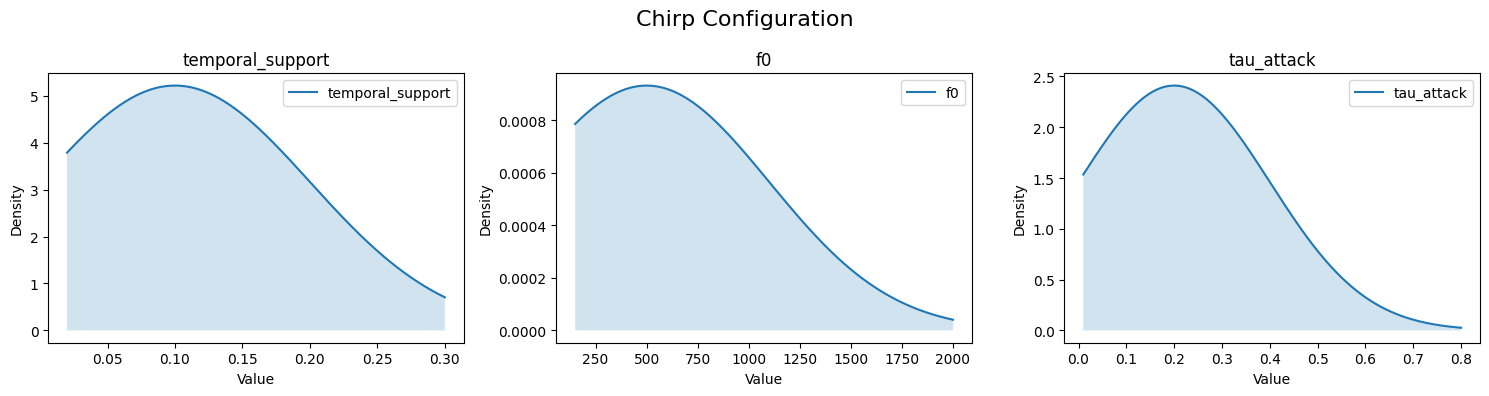

In [3]:
plot_truncated_distributions(chirp, "Chirp Configuration")

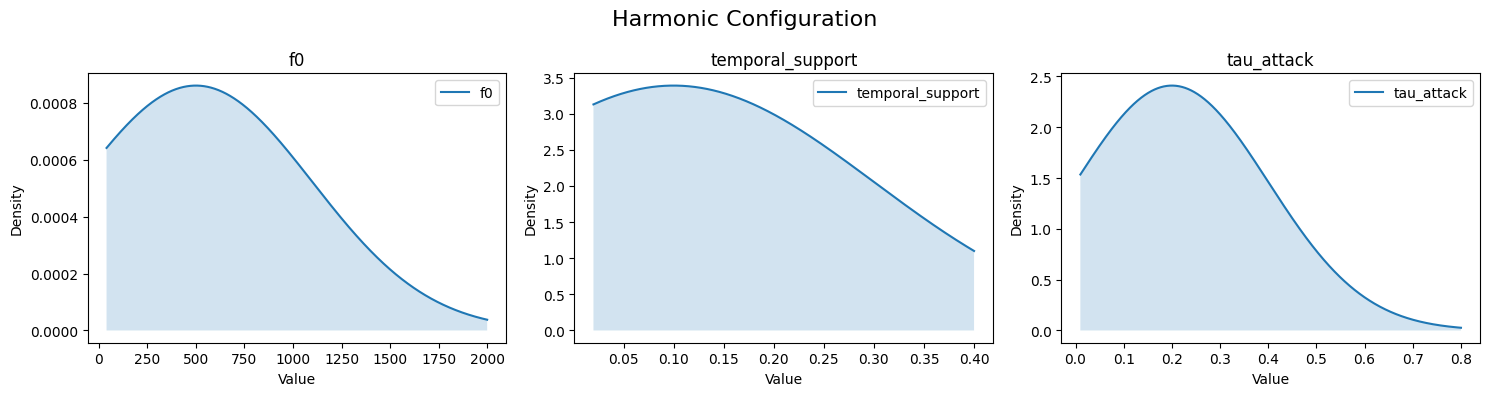

In [4]:
plot_truncated_distributions(harmonic, "Harmonic Configuration")

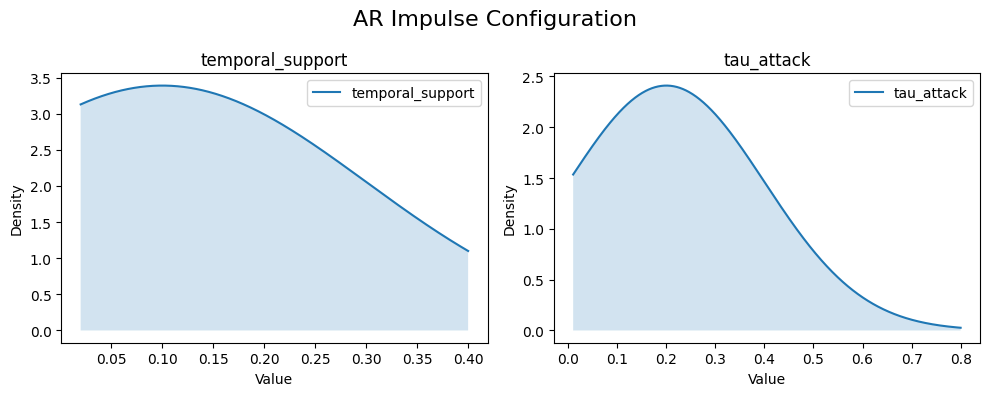

In [5]:
plot_truncated_distributions(ar_impulse, "AR Impulse Configuration")